<a href="https://colab.research.google.com/github/onesilver04/SubwayCongestion/blob/master/%EC%BD%94%EB%94%A7_%ED%98%84%EC%84%9C%2C%EC%9D%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,865 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

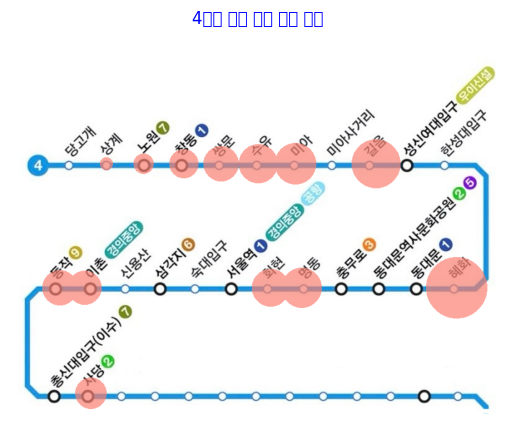

In [1]:
from PIL import Image, ImageDraw
#csv 파일을 작업하기 위해 pandas 불러오기
import pandas as pd
#원그래프를 그리기 위한 matpltlib
import matplotlib.pyplot as plt
from google.colab import drive
import cv2
import numpy as np

drive.mount('/content/drive')

# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#데이터파일의 경로와 작업 할 파일 이름 설정하기
base_dr = '/content/drive/MyDrive/csv파일/'
filename = 'subway.csv'

#콤마로 구분되어있는 csv 파일을 한글로 표 형태로 읽기
df = pd.read_csv('{0}{1}'.format(base_dr, filename), encoding= 'euc-kr')
df.loc[:, '총합'] = df.loc[:, '5시30분':'00시30분'].sum(axis=1)

# '상선'이 포함된 행을 제거합니다.
df = df[~df['상하구분'].str.contains('상선')]



# 이름이 2글자인 데이터만 선택
df_2_char = df[df['출발역'].str.len() == 2]

df_selected = df_2_char.loc[192:241, '출발역']
station_list = df_selected.tolist()

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

df
df.loc[192:241]

#전체 역의 총합 더하기
total_selected = df.loc[192:241, '총합']
total_list = total_selected.tolist()
total_list = [round(x,1) for x in total_list]
total = sum(total_list)

# '총합' 열의 데이터를 가져오기
data = df_2_char.loc[192:241, '총합']
data_list = data.tolist()
data_list = [round(x, 1) for x in data_list]

#혼잡도 %로 나타내기
data_percentages = [(value / total) * 100 for value in data_list]
data_percentages = [round(x,2) for x in data_percentages]

# 그래프 제목 설정 (선택사항)
plt.title('4호선 역별 승차 인원 비율', pad = 20, color = 'blue')

plt.axis('equal')

#이미지 파일 경로
image_path = '/content/drive/MyDrive/csv파일/sub4.jpg'

#이미지 불러오기
image = Image.open(image_path).convert("RGBA")

#draw = ImageDraw.Draw(image)

# 각 역에 대한 좌표 리스트
station_coordinates = {
    '상계': (155, 170),
    '노원': (215, 170),
    '창동': (280, 170),
    '쌍문': (340, 170),
    '수유': (400, 170),
    '미아': (460, 170),
    '길음': (590, 170),

    '혜화': (720, 370),
    '명동': (470, 370),
    '회현': (420, 370),
    '이촌': (120, 370),
    '동작': (80, 370),

    '사당': (130, 540),
}

# 투명한 이미지 생성
transparent_image = Image.new("RGBA", image.size, (0, 0, 0, 0))
transparent_draw = ImageDraw.Draw(transparent_image)

for station, percentage in zip(station_list, data_percentages):
  radius = int(8 * percentage)
  # 각 역에 대한 좌표 가져오기
  center_x, center_y = station_coordinates.get(station, (0, 0))
  #center_x = np.random.randint(0, image.width)
  #center_y = np.random.randint(0, image.height)
  #color = (250,128,114, 1)

  # Increase the transparency by setting a lower alpha value
  alpha = 64 # You can adjust this value as needed (0 for fully transparent, 255 for fully opaque)
  color = (250, 128, 114, int(255 * 0.7))

  transparent_draw.ellipse((center_x - radius, center_y - radius, center_x + radius, center_y + radius), fill=color)
  #draw.ellipse((center_x - radius, center_y - radius, center_x + radius, center_y + radius), fill = color)
  #draw = ImageDraw.Draw(image)

result_image = Image.alpha_composite(image, transparent_image)
# 이미지를 그래프 영역에 넣어서 그래프 없이 이미지만 출력
plt.imshow(result_image)
plt.axis('off')

# 그래프 출력
plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 새 섹션